<a href="https://colab.research.google.com/github/srilamaiti/ml_algo_from_scratch/blob/main/logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [135]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
random.seed(10)
np.random.seed(10)

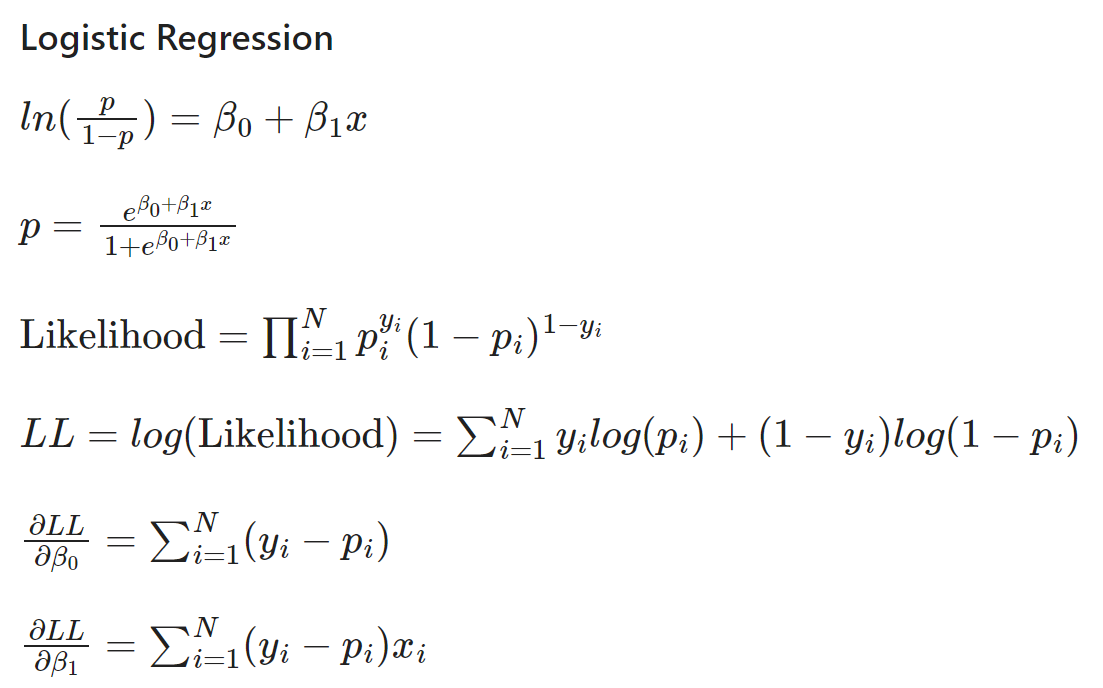

# **Creating Data**

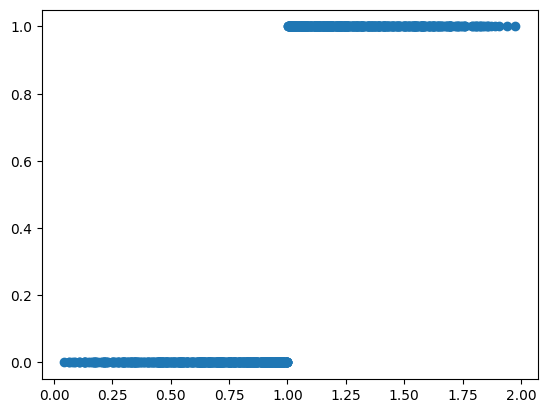

In [154]:
X = np.random.random(1000)+ 1	+ (np.random.random(1000)- 1)
y = np.array([1 if x >= 1 else 0 for x in X])
plt.scatter(X, y)

# **Initialization**

In [188]:
alpha = .001
epochs = 10000
w = 0
b = 0

# **Model**

In [164]:
def gradient_descent_log_likelihood(curr_w, curr_b, alpha, X, y):
    equation = curr_b + curr_w * X
    est_p = np.exp(equation) / (1 + np.exp(equation))
    w_adj = curr_w - alpha * np.sum((est_p - y) * X)
    b_adj = curr_b - alpha * np.sum(est_p - y)
    return w_adj, b_adj

In [189]:
for i in range(epochs):
    w, b = gradient_descent_log_likelihood(w, b, alpha, X, y)
print(w, b)

28.16959607192122 -28.078007746646936


# **Prediction**

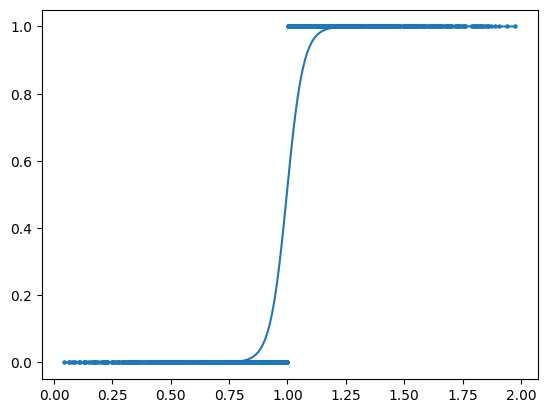

In [190]:
plt.scatter(X, y, s=5)
x_vals = np.arange(np.min(X), np.max(X), .01)
equation = b + w * x_vals
sigmoid = 1 / (1 + np.exp(-1 * equation))
plt.plot(x_vals, sigmoid)

# **Using the library**

In [191]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none')
clf.fit(np.array(X).reshape(-1,1), y)
print('beta_0: %s'%clf.intercept_[0])
print('beta_1: %s'%clf.coef_[0][0])

beta_0: -9533.094717193999
beta_1: 9525.53814332651


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


<ipython-input-192-1dc8c03e49cb>:4: RuntimeWarning: overflow encountered in exp
  p_vals = 1 / (1 + np.exp(-(clf.intercept_[0] + clf.coef_[0][0]*x_vals)))


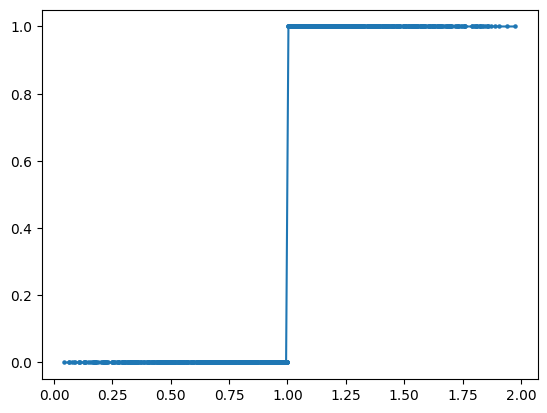

In [192]:
plt.scatter(X, y, s=5)

x_vals = np.arange(np.min(X), np.max(X), .01)
p_vals = 1 / (1 + np.exp(-(clf.intercept_[0] + clf.coef_[0][0]*x_vals)))
plt.plot(x_vals, p_vals)

# **Interpretaion of Coefficients**

One unit increase in X will increase the logit(p) by w.
Now logit(p) = log(P(y+1) / P(y=0)) = log of odds.
Thus, one unit of increase in X will increase the log of odds by w.
Ex. w = .13, so exp(.13) = 1.14, Thus log of odds will increase by 14%.
As log is a monotonically increasing function, so increassing log of odds, will incraese the probability of success more against probability of failure.